# FLIP (00) Data Vis and Linear Algebra

---
Team Director: Xiaojuan Cheng | xjcheng@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy

---


## Introduction

`matplotlib` is probably the single most used Python package for 2D-graphics. It provides both a very quick way to visualize data from Python and publication-quality figures in many formats. We are going to explore `matplotlib` in interactive mode covering most common cases.


In [11]:
%matplotlib inline
# ignore this "magic" command -- it's only necessary to setup this notebook... 

## Introduction to the basics of matplotlib visualizations

Further reading: 

http://matplotlib.org/users/pyplot_tutorial.html

http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html

## Importing Matplotlib

The popular convention is to import 
the `matplotlib.pyplot` module and alias it to `plt` for easier typing:


In [12]:
import matplotlib.pyplot as plt

## Interactively plotting

Note: the following instructions only apply if you are trying things out in ipython -- which you _should_ be doing when trying out matplotlib.

When testing things out in iPython, if you want to see the chart images pop-up as you execute the charting commands, begin your iPython session by [running the `%matplotlib` magic command](https://ipython.org/ipython-doc/3/interactive/magics.html#magic-matplotlib) (however, _don't_ include it in any standalone Python scripts):


```py
%matplotlib
import matplotlib.pyplot as plt
```

### Getting unstuck out of a stuck iPython prompt

In current versions of matplotlib, iPython, OSX, you may run into an error where the prompt just freezes. [This is a known bug](https://github.com/ipython/ipython/issues/9128). Just hit Ctrl-C a couple of times and then Enter to break out of whatever command you were stuck in (you'll have to retype the command).






## The simplest plot

The following snippet is all you need to get a chart going in matplotlib. We actually won't be using this convention going forward, but it's worth seeing the minimal amount of code needed to make a graph:

<Container object of 4 artists>

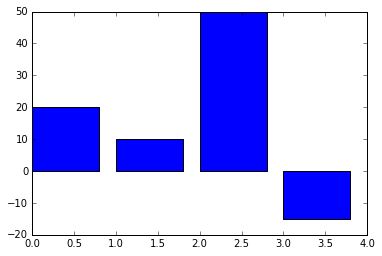

In [13]:
xvals = [0, 1, 2, 3]
yvals = [20, 10, 50, -15]
plt.bar(xvals, yvals)

## Saving the simplest plot to disk

To save to file, use the `savefig()` method:

```py
plt.savefig('hello.png')
```


### Removing the active chart (while interactively plotting)

If you are doing these commands in iPython, then a chart window will have popped up with the rendered-chart image as as soon as you executed the `plt.bar()` method. To clear the space, call the `plt.close()` method:

```py
plt.close()
```




## Making "subplots" and using `fig` and `ax`

While the invocation of methods on the global `plt` object will produce charts quick and easy, we'll be following this general convention (note that `plot()` is a method for drawing line charts):

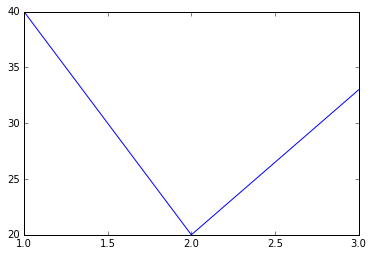

In [14]:
fig, ax = plt.subplots()
ax.plot([1,2,3], [40, 20, 33])

What's `fig`? What's `ax`? And what exactly is `plt.subplots()` doing? It's not worth explaining in these simple examples, but it's a convention worth getting into the habit of as it allows us to be more flexible in the future. And it's not too hard to memorize.

Here's another example, this time using the `scatter()` chart method:

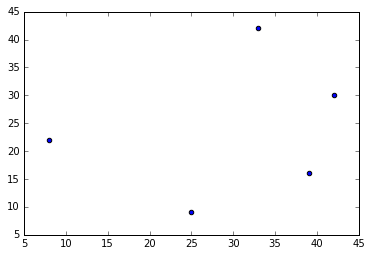

In [19]:
fig, ax = plt.subplots()
xvals = [42, 8, 33, 25, 39]
yvals = [30, 22, 42, 9, 16]
ax.scatter(xvals, yvals)


## Saving figures

Using the `fig, ax = plt.subplots()` convention, saving to disk is slightly different: call the `savefig()` method via the `fig` object:

```py
fig.savefig('helloagain.jpg')
```


## Charting multiple data series

To chart more than one series of data on a single set of axes, simply invoke the charting methods of the given axes multiple times:

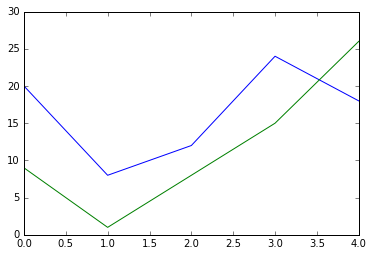

In [22]:
fig, ax = plt.subplots()
xvals = [0, 1, 2, 3, 4]
y1 = [20, 8, 12, 24, 18]
y2 = [9, 1, 8, 15, 26]
ax.plot(xvals, y1)
ax.plot(xvals, y2)

Want multiple _types_ of charts on a single set of axes? Just call different types of charts on a single axes:

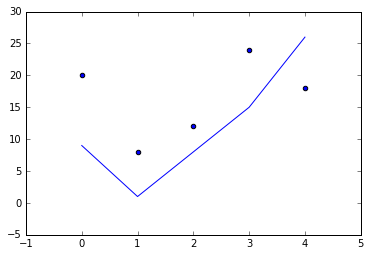

In [27]:
fig, ax = plt.subplots()
xvals = [0, 1, 2, 3, 4]
y1 = [20, 8, 12, 24, 18]
y2 = [9, 1, 8, 15, 26]
ax.scatter(xvals, y1)
ax.plot(xvals, y2)

## The importance of data structure

We've only scratched the surface of Matplotlib's visualization methods, but the main constraint we'll face is having correctly-structured data. 

For instance, matplotlib will throw an error if we attempt to chart x-values and y-values in which the relationship is not 1-to-1:


```py
xvals = [0, 1, 2]
yvals = [42]
ax.bar(xvals, yvals)

# ValueError: incompatible sizes: argument 'height' must be length 3 or scalar
```


And certain data structures don't make sense for certain charts. Here's a valid pie chart:


([<matplotlib.patches.Wedge at 0x110e16630>,
  <matplotlib.text.Text at 0x110f6dfd0>])

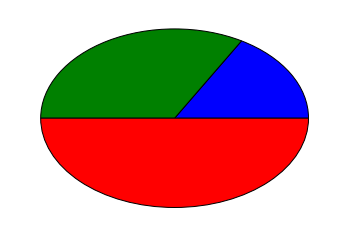

In [39]:
yvals = [10, 20, 30]
fig, ax = plt.subplots()
ax.pie(yvals)

However, the `pie()` call doesn't take in x- and y- parameters -- instead, the second argument is the `explode` value, easier shown than explained:

([<matplotlib.patches.Wedge at 0x110d69da0>,
  <matplotlib.text.Text at 0x110e9c9e8>])

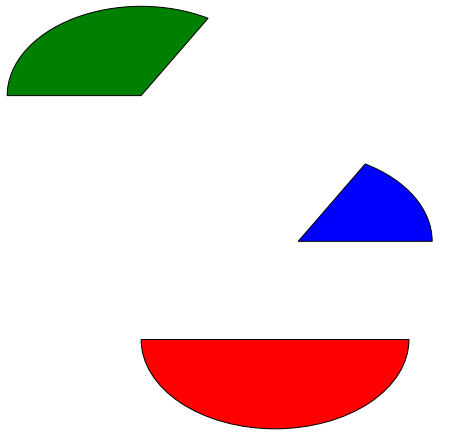

In [38]:
a = [10, 20, 30]
b = [0.2, 2, 1]

fig, ax = plt.subplots()
ax.pie(a, b)


## Stacked bar charts

Matplotlib offers a variety of ways to arrange multiple-series data. It's worth looking at the logic behind how a stacked bar chart is created.

First, start with a single bar chart:

<Container object of 5 artists>

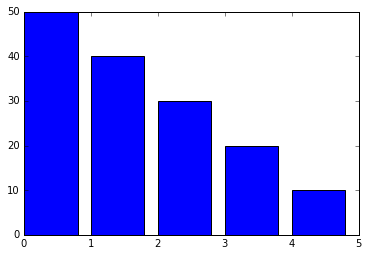

In [41]:
xvals = [0, 1, 2, 3, 4]
y1 = [50, 40, 30, 20, 10]
fig, ax = plt.subplots()
ax.bar(xvals, y1)

What is the structure of data of a stacked bar chart? It's when two data series share the same independent variable (i.e. x-axis). 

However, simply calling `bar()` twice creates overlapping bars...which is not quite what we want:

(note that I've added the `color` argument to the second call to make the different charts stand out):


<Container object of 5 artists>

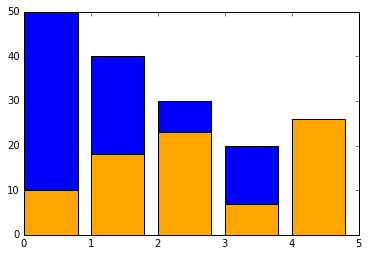

In [47]:
xvals = [0, 1, 2, 3, 4]
y1 = [50, 40, 30, 20, 10]
y2 = [10, 18, 23, 7, 26]
fig, ax = plt.subplots()
ax.bar(xvals, y1)
ax.bar(xvals, y2, color='orange')

To get the grouped effect, we need to pass the `bottom` argument to the second call of `bar()`. What do we pass into that argument? The list of y-values that are in the _first_ call of `bar()`:

<Container object of 5 artists>

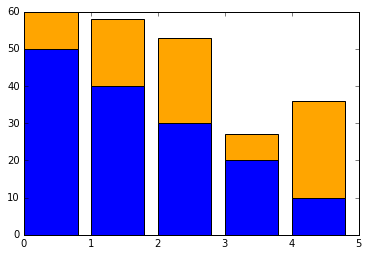

In [48]:
xvals = [0, 1, 2, 3, 4]
y1 = [50, 40, 30, 20, 10]
y2 = [10, 18, 23, 7, 26]
fig, ax = plt.subplots()
ax.bar(xvals, y1)
ax.bar(xvals, y2, color='orange', bottom=y1)

In effect, we've told the matplotlib plotter that we want to start the `y2` values from where each corresponding `y1` value left off, i.e. stack `y2` on top of `y1`.


What happens when the `y1` and `y2` values have _different_ x-values? Something weird...which is why you shouldn't be stacking non-aligning data series: 

<Container object of 5 artists>

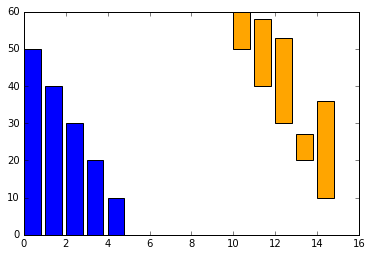

In [49]:
x1 = [0, 1, 2, 3, 4]
y1 = [50, 40, 30, 20, 10]
x2 = [ 10, 11, 12, 13, 14]
y2 = [10, 18, 23, 7, 26]
fig, ax = plt.subplots()
ax.bar(x1, y1)
ax.bar(x2, y2, color='orange', bottom=y1)

## Plotting categorical data

One more example to show how picky matplotlib is about data structure.

Pretend we have two _things_, e.g. 'apples' and 'orranges', with two corresponding y-values, e.g. `42` and `25`, to represent `42 apples` and `25 oranges`. 

Unfortunately, we can't plot the __categories__ of `apples` and `oranges` along the x-axis so easily:


```py
xvals - ['apples', 'oranges']
yvals = [42, 25]
fig, ax = plt.subplots()
ax.bar(xvals, yvals)
```

We get this arcane error:

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-51-368b1dcacfa1> in <module>()
----> 1 xvals - ['apples', 'oranges']
      2 yvals = [42, 25]
      3 fig, ax = plt.subplots()
      4 ax.bar(xvals, yvals)

TypeError: unsupported operand type(s) for -: 'list' and 'list'
```

Basically, matplotlib won't deal with anything but numerical values -- integers, floats, or datetimes -- when plotting a chart. It just simply doesn't know where `apples` and `oranges` -- which we refer to as __categorical__ (as opposed to _continuous_) values -- should be positioned along the x-axis. 

So we have to hold matplotlib by the hand and tell it:

1. For the y-values of `42` and `25`, plot them against the x-values of `0` and `1` -- for now.
2. Then, label the x-axis with 0 and 1, using `ax.set_xticks()`
3. OK, where the `0` and `1` x-axis labels currently exist, replace them with `apples` and `oranges`, respectively, using `ax.set_xticklabels()`



Here's the code to do that:


<Container object of 2 artists>

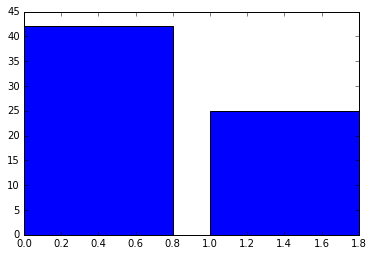

In [53]:
# Step 1

xvals = [0, 1]
yvals = [42, 25]

fig, ax = plt.subplots()
ax.bar(xvals, yvals)


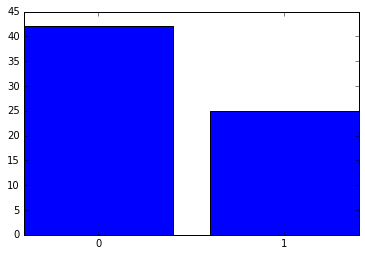

In [56]:
# Step 1 & 2

xvals = [0, 1]
yvals = [42, 25]

fig, ax = plt.subplots()
# note that I specify the `align` argument in the `bar()` call:
ax.bar(xvals, yvals, align='center')
ax.set_xticks(xvals)


[<matplotlib.text.Text at 0x1186b4278>, <matplotlib.text.Text at 0x11992a828>]

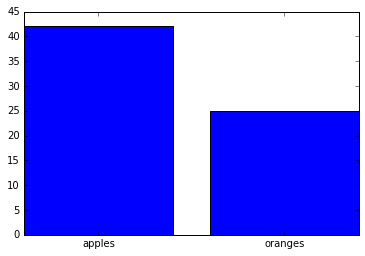

In [57]:
# Steps 1,2,3
# Step 1 & 2

xlabels = ['apples', 'oranges']
xvals = [0, 1]
yvals = [42, 25]

fig, ax = plt.subplots()
# note that I specify the `align` argument in the `bar()` call:
ax.bar(xvals, yvals, align='center')
ax.set_xticks(xvals)
ax.set_xticklabels(xlabels)

It'd be nice if matplotlib just "knew" how to deal with a set of human-readable labels for a simple bar chart. But just like most parts of Python programming, explicitness over ambiguity is required.